In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data files and combine into one df
indiv = pd.read_pickle('/Users/david/Documents/data.science.tools1/git_project/analysis_of_crp_data/indivs.pkl')
indiv16 = pd.read_pickle('/Users/david/Documents/data.science.tools1/git_project/analysis_of_crp_data/indivs16.pkl')
frames = [indiv,indiv16]
indivDF = pd.concat(frames,ignore_index=True)

In [84]:
# Noted only two instances of 'U', unknown, noted the amount total is $550 and immaterial. Dropped two instances
# For purposes of visualization removed PAC contributions
indivDFnoPac = indivDF.loc[np.logical_and.reduce((indivDF.Party != 'U', indivDF.Party != 'P'))]

In [116]:
indivDFnoPac.replace({'Party': {'3': 'I/O', 'O': 'I/O'}}, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [117]:
indivDFnoPac.groupby('Party').size()

Party
D      405266
I/O      8008
R      179833
dtype: int64

Text(0.5, 1.0, 'Number of Individual Contributions')

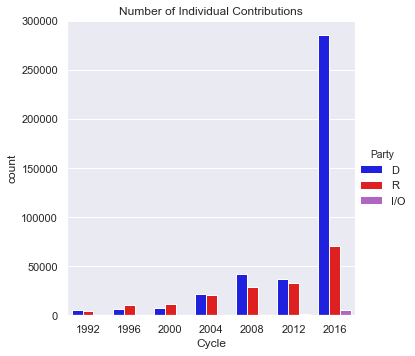

In [118]:
sns.set(style="darkgrid")
colors=['blue','red','mediumorchid']
sns.catplot(x='Cycle',hue='Party',palette=colors,kind="count", \
            data=indivDFnoPac)
plt.title('Number of Individual Contributions')


In [119]:
amountDF = indivDF.loc[np.logical_and.reduce((indivDF.Party != 'U', indivDF.Party != 'P'))]\
.groupby(['Cycle','Party'],as_index=False)['Amount'].sum()


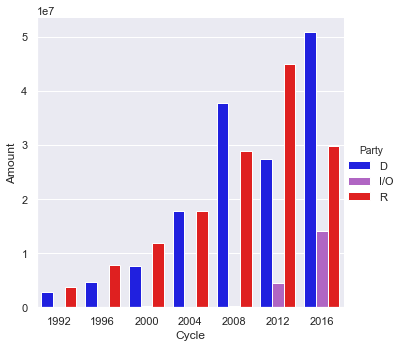

In [183]:
colors=['blue','mediumorchid','red']
sns.catplot(x='Cycle',y= 'Amount',hue='Party',palette=colors,kind="bar", \
            data=amountDF)

In [121]:
pacDF = indivDF[indivDF.Party == 'P']

Text(0.5, 1.0, 'Individual Contributions to PACs')

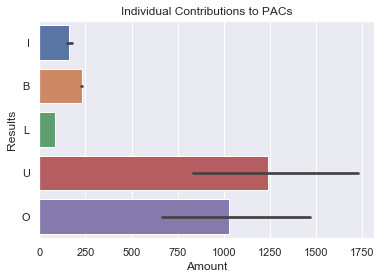

In [122]:
#colors=['blue','mediumorchid','yellow','red']
label=['Ideological','Business','Labor','Unknown','Other']
sns.barplot(x='Amount',y= 'Results', data=pacDF)
plt.title('Individual Contributions to PACs')
#plt.legend(plot,label)
#plt.legend(loc='upper right')
#plt.legend('label1', 'label2', 'label3','s','s','f')

In [123]:
winloss = indivDF.loc[np.logical_and.reduce((indivDF.Party != 'U', indivDF.Party != 'P',indivDF.Results != 'I',indivDF.Results != 'N',indivDF.Results != 'P',indivDF.Results != 'C',indivDF.Results != 'O',indivDF.Results != 'K',indivDF.Results != 'B',indivDF.Results != 'U'))]\
.groupby(['Cycle','Party','Results'],as_index=False)['Amount'].sum()

Text(0.5, 1.0, 'Individual Contributions and Results')

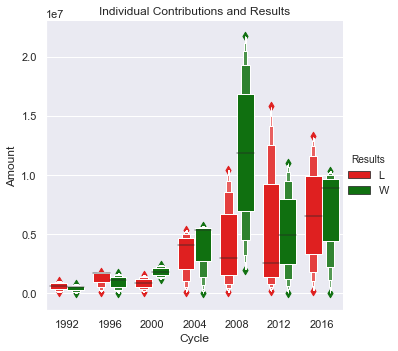

In [124]:
colors=['red','green']
sns.catplot(x='Cycle',y= 'Amount',hue='Results',palette=colors,kind="boxen", \
            data=winloss)
plt.title('Individual Contributions and Results')

With the large range in amounts donated, the boxen plot captures more quantiles than that of the box plot, thus giving a clearer picture of the distributution, particularly in the the tails. 

We note from this plot several trends, first, as contributions have increased through election cycles the correlation between winning and recieving more contributions is stronger. We note that the median amount of money recieved for the winning candidate is higher than that of the losing candidate in all years subsequent to year 2000.  


In [125]:
winlossGross = indivDF.loc[np.logical_and.reduce((indivDF.Party != 'U', indivDF.Party != 'P',indivDF.Results != 'I',indivDF.Results != 'N',indivDF.Results != 'P',indivDF.Results != 'C',indivDF.Results != 'O',indivDF.Results != 'K',indivDF.Results != 'B',indivDF.Results != 'U'))]\
.groupby(['Party','Results'],as_index=False)['Amount'].sum()

Text(0.5, 1.0, 'Individual Contributions and Results')

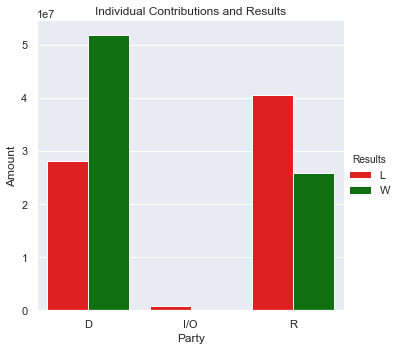

In [126]:
colors=['red','green']
sns.catplot(x='Party',y= 'Amount',hue='Results',palette=colors,kind="bar", \
            data=winlossGross)
plt.title('Individual Contributions and Results')

Text(0.5, 1.0, 'Individual Contributions and Results')

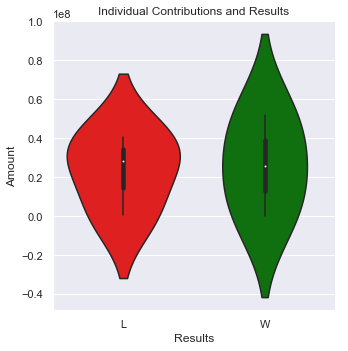

In [131]:
colors=['red','green']
sns.catplot(x='Results',y= 'Amount',palette=colors,kind="violin", \
            data=winlossGross)
plt.title('Individual Contributions and Results')

In [140]:
win = winlossGross[winlossGross.Results=='L']['Amount'].sum()
loss = winlossGross[winlossGross.Results=='W']['Amount'].sum()    

69487815

In [171]:
winloss1 = indivDF.loc[np.logical_and.reduce((indivDF.Party != 'U', indivDF.Party != 'P',indivDF.Results != 'I',indivDF.Results != 'N',indivDF.Results != 'P',indivDF.Results != 'C',indivDF.Results != 'O',indivDF.Results != 'K',indivDF.Results != 'B',indivDF.Results != 'U'))].groupby(['Party','Cycle'],as_index=False).mean()

Text(0.5, 1.0, 'Average Individual Contributions')

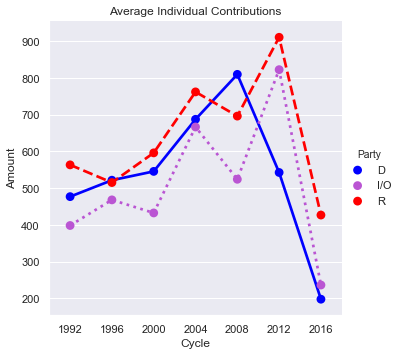

In [182]:
colors=['blue','mediumorchid','red']
sns.catplot(x="Cycle",y= 'Amount',hue='Party',palette=colors,kind="point",data=winloss1,linestyles=['-',':','--'])
plt.title('Average Individual Contributions')